<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [47]:
## Import the packages
import numpy as np
from scipy import stats
import pandas as pd
import pingouin as pg
import seaborn as sns

In [270]:
data = pd.read_csv('data/all_data.csv')
data.columns

Index(['Phase', 'ID', 'Partner', 'Gender', 'Action', 'Disability',
       'ProfMother', 'ProfFather', 'Age', 'AgeGroup', 'AttendHours',
       'HoursPlanned', 'RelAttend', 'FacAge', 'FacGender', 'FacFemRatio',
       'FacMalRatio', 'PartcFacRatio', 'FacConstancy', 'PreQ1', 'PreQ2',
       'PreQ3', 'PreQ4', 'PreQ5', 'PreQ6', 'PreQ7', 'PreQ8', 'PreQ9', 'PreQ10',
       'PreQ11', 'PreQ12', 'PreQ13', 'PreQ14', 'PreQ15', 'PreQ16', 'PreSelf1',
       'PreSelf2', 'PreSelf3', 'PreQSum', 'PostQ1', 'PostQ2', 'PostQ3',
       'PostQ4', 'PostQ5', 'PostQ6', 'PostQ7', 'PostQ8', 'PostQ9', 'PostQ10',
       'PostQ11', 'PostQ12', 'PostQ13', 'PostQ14', 'PostQ15', 'PostQ16',
       'PostSelf1', 'PostSelf2', 'PostSelf3', 'PostQSum', 'PreWf', 'PreEg',
       'PreNe', 'PreVz', 'PreVth', 'PreBfa', 'PreBfu', 'PrePe', 'PreHu',
       'PreUka', 'PreUkb', 'PreUkc', 'PreUkd', 'PreZf', 'PreTSDSum',
       'PreTSDPR', 'PreTSDSummZf', 'PostWf', 'PostEg', 'PostNe', 'PostVz',
       'PostVth', 'PostBfa', 'PostBfu', 'P

In [229]:
data = data[data['PreQSum']<100]
data

,Phase,ID,Partner,Gender,Action,Disability,ProfMother,ProfFather,Age,AgeGroup,...,PostPe,PostHu,PostUka,PostUkb,PostUkc,PostUkd,PostZf,PostTSDSum,PostTSDPR,PostTSDSummZf
0,2,educ23,5,,1,0,,,12,2,...,0,0,0,0,0,0,2,15,,13
1,1,eduC18,5,0,1,0,musea employee,musician,,,...,2,0,0,0,0,0,1,27,,26
2,1,eduC07,5,0,1,0,/,/,,,...,0,0,0,0,3,0,,,,25
3,1,eduC11,5,0,1,0,headmaster school,city employee,,,...,0,0,0,0,0,0,0,22,,22
4,1,WAAG1B07,9,0,2,0,,,,,...,2,0,0,0,3,0,3,,,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,1,ZSI16,1,1,1,0,,Mechanic,11,2,...,0,0,0,0,0,0,6,21,45,15
772,2,POLY96,4,1,5,0,,,14,2,...,,,,,,,,,,
773,2,MEPF0501,3,1,3,0,,,13,2,...,0,0,0,0,3,0,4,19,,15
774,2,MEPF0504,3,1,3,0,,,12,2,...,0,0,3,0,0,0,4,29,,25


In [218]:
pre = data.PreQSum
post = data.PostQSum

gender = data.Gender

mean_pre = pre.mean()
mean_post = post.mean()
print('\n',mean_pre,'\n',mean_post)

post.std()


 54.92 
 55.553548387096775


7.798622397224415

In [291]:
371/774

0.479328165374677

In [167]:
# female = '0'
gender.groupby(gender).count()

Gender
       1
0    371
1    403
Name: Gender, dtype: int64

In [ ]:
# zentrale Tendenz (hier arithm. Mittel) 
# CI confidence intervall (1 standardabweichung = 68%); entspricht standard- oder stichprobenfehler
# CI = 95  (zwei Standardabweichung),d.h. 95% aller Werte liegen innerhalb des roten Bandes 


<ipython-input-327-8eea3c0f6781>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticks(), size = 15)
<ipython-input-327-8eea3c0f6781>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticks(), size = 15)


[Text(30.0, 0, '30.0'),
 Text(40.0, 0, '40.0'),
 Text(50.0, 0, '50.0'),
 Text(60.0, 0, '60.0'),
 Text(70.0, 0, '70.0'),
 Text(80.0, 0, '80.0'),
 Text(90.0, 0, '90.0')]

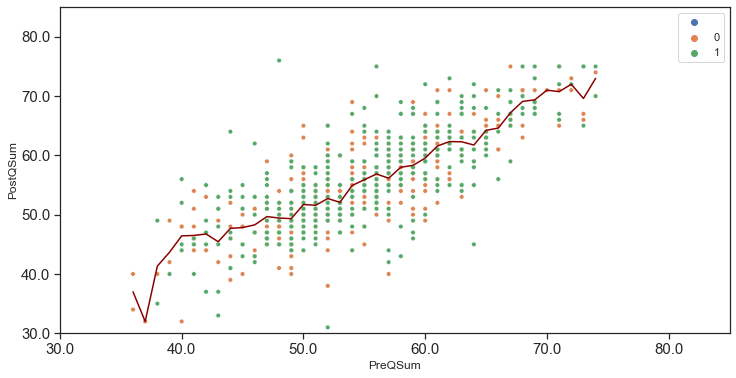

In [327]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('ticks')

g = sns.scatterplot(x=pre,y=post, s = 20, hue = gender)
g = sns.lineplot (x=pre,y=post, ci=None, color='darkred') 

g.set(xlim=(30, 85))
g.set(ylim=(30, 85))
g.set_yticklabels(g.get_yticks(), size = 15)
g.set_xticklabels(g.get_xticks(), size = 15)

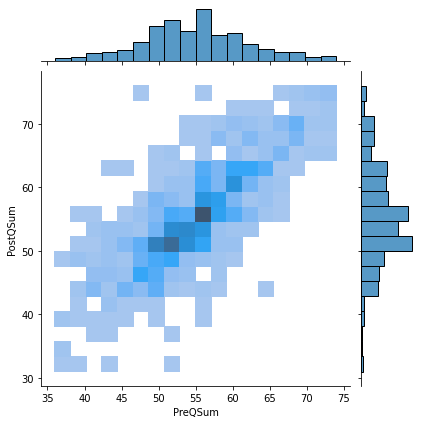

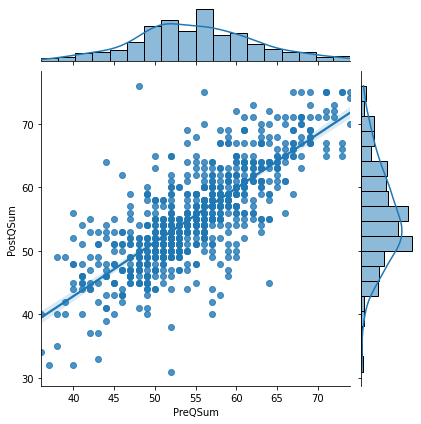

In [179]:
sns.jointplot(x=pre,y=post, kind='hist')
sns.jointplot(x=pre,y=post, kind='reg')


<AxesSubplot:xlabel='PreQSum', ylabel='PostQSum'>

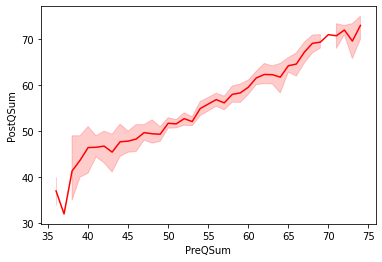

In [125]:
# By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.
sns.lineplot (x=pre,y=post, color = 'red')

In [311]:
data['change']=post - pre
data.change.mean()

0.6335483870967742

<ipython-input-329-1ea65c35f595>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ge.set_yticklabels(ge.get_yticks(), size = 20)
<ipython-input-329-1ea65c35f595>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ge.set_xticklabels(ge.get_xticks(), size = 20)


[Text(-30.0, 0, '-30.0'),
 Text(-20.0, 0, '-20.0'),
 Text(-10.0, 0, '-10.0'),
 Text(0.0, 0, '0.0'),
 Text(10.0, 0, '10.0'),
 Text(20.0, 0, '20.0'),
 Text(30.0, 0, '30.0'),
 Text(40.0, 0, '40.0')]

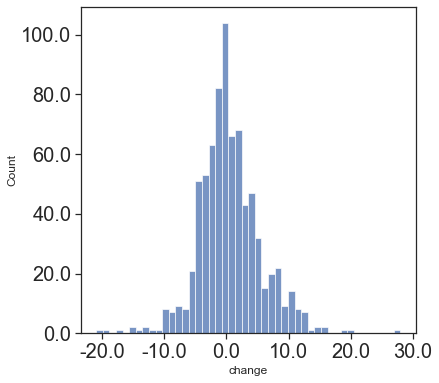

In [329]:
ge = sns.set(rc={'figure.figsize':(6,6)})
ge = sns.set_style('ticks')
ge = sns.histplot(data.change,kde=False)
ge.set_yticklabels(ge.get_yticks(), size = 20)
ge.set_xticklabels(ge.get_xticks(), size = 20)


In [100]:
# 
pg.ttest(data.change, y=0).round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.54,774,two-sided,0.0,"[0.28, 0.98]",0.13,19.839,0.94


In [102]:
# paired 2 group test 
pg.ttest(x=pre, y=post, paired=True).round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.54,774,two-sided,0.0,"[-0.98, -0.28]",0.08,19.839,0.65


In [313]:
W, p=stats.shapiro(x=data.change)

print(f"The value of W is {W}, p={p}")

The value of W is nan, p=1.0


<AxesSubplot:xlabel='PreQSum', ylabel='Count'>

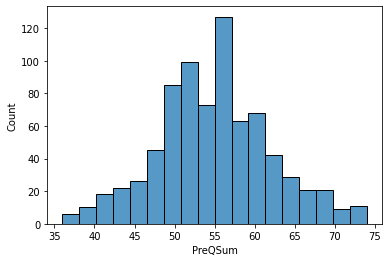

In [110]:
sns.histplot(pre,kde=False)

In [242]:
pre_c = pd.to_numeric(data.PreTSDSummZf, errors='coerce')
post_c = pd.to_numeric(data.PostTSDSummZf, errors='coerce')
mean_pre_c = pre_c.mean()
mean_post_c = post_c.mean()
print('\n',mean_pre_c,'\n',mean_post_c)

#data_c ['PreTSDSummZf'] = pd.to_numeric(data_c['PreTSDSummZf'])
data_c


 18.79073756432247 
 20.363951473136915


,Phase,ID,Partner,Gender,Action,Disability,ProfMother,ProfFather,Age,AgeGroup,...,PostPe,PostHu,PostUka,PostUkb,PostUkc,PostUkd,PostZf,PostTSDSum,PostTSDPR,PostTSDSummZf
0,2,educ23,5,,1,0,,,12,2,...,0,0,0,0,0,0,2,15,,13
1,1,eduC18,5,0,1,0,musea employee,musician,,,...,2,0,0,0,0,0,1,27,,26
2,1,eduC07,5,0,1,0,/,/,,,...,0,0,0,0,3,0,,,,25
3,1,eduC11,5,0,1,0,headmaster school,city employee,,,...,0,0,0,0,0,0,0,22,,22
4,1,WAAG1B07,9,0,2,0,,,,,...,2,0,0,0,3,0,3,,,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,2,educ41,5,1,1,0,,,12,2,...,0,0,0,0,0,0,2,28,,26
769,2,ZSI0223,1,1,1,0,,,15,2,...,0,0,0,0,3,0,1,,,13
771,1,ZSI16,1,1,1,0,,Mechanic,11,2,...,0,0,0,0,0,0,6,21,45,15
773,2,MEPF0501,3,1,3,0,,,13,2,...,0,0,0,0,3,0,4,19,,15


In [301]:
data['change_c']=post_c - pre_c
data.change_c.mean()

1.6031195840554593

<ipython-input-325-643a9319c528>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  gch.set_yticklabels(gch.get_yticks(), size = 20)
<ipython-input-325-643a9319c528>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  gch.set_xticklabels(gch.get_xticks(), size = 20)


[Text(-30.0, 0, '-30.0'),
 Text(-20.0, 0, '-20.0'),
 Text(-10.0, 0, '-10.0'),
 Text(0.0, 0, '0.0'),
 Text(10.0, 0, '10.0'),
 Text(20.0, 0, '20.0'),
 Text(30.0, 0, '30.0')]

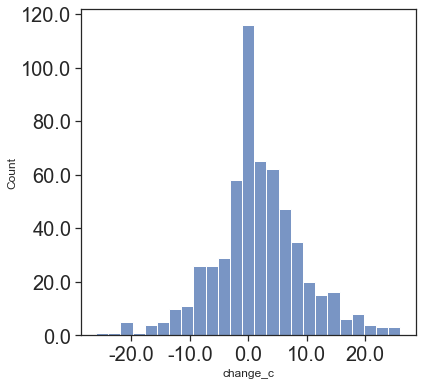

In [325]:
gch = sns.set(rc={'figure.figsize':(6,6)})
gch = sns.set_style('ticks')
gch = sns.histplot(data.change_c,kde=False)
gch.set_yticklabels(gch.get_yticks(), size = 20)
gch.set_xticklabels(gch.get_xticks(), size = 20)

In [308]:
# test auf normalverteilung 
W, p=stats.shapiro(x=data.change_c)
p = round(p, 2)

print(f"The value of W is {W}, p={p}")

The value of W is nan, p=1.0


<ipython-input-322-486aeda76de5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  gc.set_yticklabels(gc.get_yticks(), size = 15)
<ipython-input-322-486aeda76de5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  gc.set_xticklabels(gc.get_xticks(), size = 15)


[Text(-10.0, 0, '-10.0'),
 Text(0.0, 0, '0.0'),
 Text(10.0, 0, '10.0'),
 Text(20.0, 0, '20.0'),
 Text(30.0, 0, '30.0'),
 Text(40.0, 0, '40.0'),
 Text(50.0, 0, '50.0'),
 Text(60.0, 0, '60.0')]

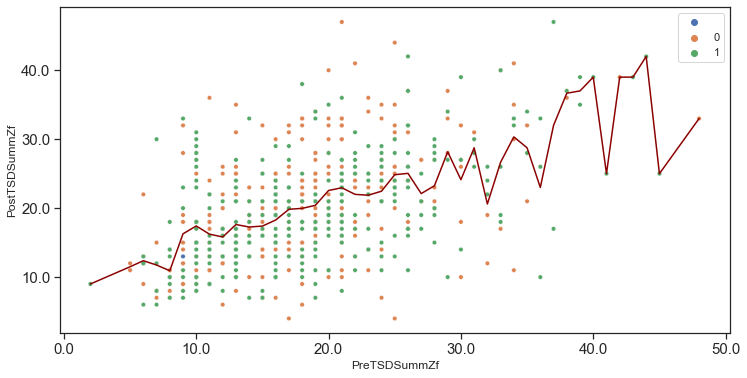

In [322]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('ticks')
gc = sns.scatterplot(x=pre_c,y=post_c, s = 20, hue = gender)
gc = sns.lineplot (x=pre_c,y=post_c, ci=None, color='darkred') 
#gc = sns.lineplot (x=pre_c,y=post_c, ci=95, color='darkred') 
gc.set_yticklabels(gc.get_yticks(), size = 15)
gc.set_xticklabels(gc.get_xticks(), size = 15)

In [300]:
pg.ttest(x=post_c, y=pre_c, paired=True).round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.98,576,two-sided,0.0,"[0.97, 2.24]",0.2,8242.849,1.0


In [320]:
def mean_confidence_interval(change_c, confidence=0.95):
    a = change_c
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return pd.DataFrame({"mean":[m], "lower 95CI": [m-h], "upper 95CI":[m+h]})

mean_confidence_interval(data.change_c).round(2)

,mean,lower 95CI,upper 95CI
0,1.6,NaN,NaN


In [253]:
professions = data.ProfMother[data.ProfMother != ' ']
professions

1            musea employee
2                         /
3         headmaster school
6      scientific projectma
10       cinema coordinator
               ...         
738                      DN
743                      DN
749                 Teacher
761       hospital employee
765               Professor
Name: ProfMother, Length: 175, dtype: object

In [271]:
# age needs inspection  
age = data.Age[data.Age != ' ']
age = pd.to_numeric(age)
print(age.mean(),'\n',age.min(), '\n',age.max())
len (age)

12.001364256480219 
 6 
 17


733

<ipython-input-298-cb68b934eafb>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ga.set_yticklabels(ga.get_yticks(), size = 15)
<ipython-input-298-cb68b934eafb>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ga.set_xticklabels(ga.get_xticks(), size = 15)


[Text(4.0, 0, '4.0'),
 Text(6.0, 0, '6.0'),
 Text(8.0, 0, '8.0'),
 Text(10.0, 0, '10.0'),
 Text(12.0, 0, '12.0'),
 Text(14.0, 0, '14.0'),
 Text(16.0, 0, '16.0'),
 Text(18.0, 0, '18.0'),
 Text(20.0, 0, '20.0')]

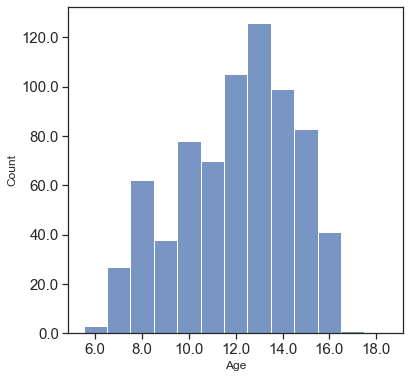

In [298]:

ga = sns.set(rc={'figure.figsize':(6,6)})
ga = sns.set_style('ticks')
ga = sns.histplot(age,kde=False, binrange = (6,18), binwidth= 0.5, discrete=True)
ga.set_yticklabels(ga.get_yticks(), size = 15)
ga.set_xticklabels(ga.get_xticks(), size = 15)